In [1]:
import cv2, numpy as np
from matplotlib import pyplot as plt
import random
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

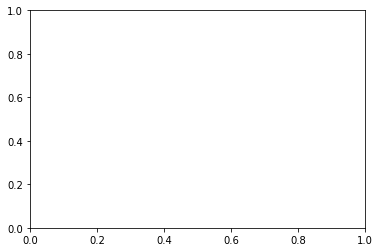

In [2]:
image = cv2.imread('ocr-text.png',0)   
#img_blur = cv2.GaussianBlur(image, (3,3), 0)
binary = cv2.adaptiveThreshold(image, 255,
          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
          cv2.THRESH_BINARY, 21, 5)
imshow("", binary)
cv2.imwrite("out.png", binary)

In [ ]:
#원본으로 했을때
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

str = print(pytesseract.image_to_string('ocr-text.png')) #첫번째 파라미터에는 이미지명을 넣어준다.



In [ ]:
#Threshold로 했을때
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

str = print(pytesseract.image_to_string('out.png')) #첫번째 파라미터에는 이미지명을 넣어준다.


In [ ]:
#영수증
#한글을 제외하고는 인식이 잘되면 된다. 그런데, 수를 제대로 인식하지 못한다.
#threshold를 두번을 나눠서하거나, 여러가지 방법이 있다.
#첫번째, 영수증과 바닥
#두번째, 글씨와 종이
#기계입장에서 한글이 인식하기 제일 어렵다. 노이즈 처리때문에

image = cv2.imread('mart5.jpg')
str = print(pytesseract.image_to_string('mart5.jpg')) #첫번째 파라미터에는 이미지명을 넣어준다.

plt.figure(figsize = (12, 12))
imshow(" ", image)

In [ ]:
#카드
img = cv2.imread('creditcard.png')
image = cv2.imread('creditcard.png',0)   
imshow("original", image)
imshow("bw", image)
#img_blur = cv2.GaussianBlur(image, (3,3), 0)
binary = cv2.adaptiveThreshold(image, 255,
          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
          cv2.THRESH_BINARY, 21, 5)
imshow("binary", binary)
cv2.imwrite("out1.png", binary)

str = print(pytesseract.image_to_string('creditcard.png')) #첫번째 파라미터에는 이미지명을 넣어준다.
str = print(pytesseract.image_to_string('out1.png')) #첫번째 파라미터에는 이미지명을 넣어준다.


#노이즈가 있기때문에, Binary를 시켜주면 정확률이 올라간다.
#회전도 처리가 안되있어서 사람이 처리를 해주어야 한다.

In [ ]:
#canny만 했을시
image = cv2.imread("C:/Users/student/Desktop/OpenCV/book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 10, 250) #250보다 edge량이 크면 다 edge로 본다. edge(1차 미분으로 즉 뺄셈), edge가 10보다 작으면, edge로 안본다.
#즉, 10과 250사이가 아니라, edge의 크기가 10보다 작으면 버리고, 250보다 크면 edge로 본다는것
#중간의 수치는 상황에 따라 다르다. 즉, 10 ~ 250 사이에 있는것은 canny는 밝기의 변화량까지 보고 판단한다.
#즉, 주변이 edge면 edge로, 노이즈면, 노이즈로 판단한다, 즉, 노이즈에 덜 민감하다.
#이것도 문제에 따라서, 최적의 파라미터를 찾아야한다. 보편적인 값은 존재하지 않는다.

imshow("canny", edged) #canny는 최외각에 대한(연결된 부분까지 참조를 하는(1985)알고리즘) edge들만 나온다.

#가우시안 블러링 미적용하고, canny만 했을시
image = cv2.imread("C:/Users/student/Desktop/OpenCV/book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 10, 250)
imshow("canny", edged) #canny는 최외각에 대한 edge들만 나온다.


In [ ]:
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
imshow("", closed)

In [ ]:
#오늘은 기하학적인 변화에 대해 이해해보자
#칸투어방식은 이진화가 안된다.
#끊어져 있어서, 얘만가지고, 경계값을 찾는데는 무리가 있다.

cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #최바깥의 칸투어만 추출한다.
total = 0

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True) #0.02는 경험적 기반으로 찾은 값(보편적인 값)

    if len(approx) == 4: #사각형만, 4일때만 칸투어를 그린다.
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4) #-1은 전체 칸투어를 그리라는 의미, 0은 바깥쪽, 1은 안쪽 칸투어만 그리라는 의미
        #그러나, 위의 cv2.RETR_EXRERNAL가 있기 때문에, 0을 쓸 필요 없다.
        total += 1
        
print("I found {0} books in that image".format(total))
imshow("Output", image)

In [ ]:
#오늘은 기하학적인 변화에 대해 이해해보자
#칸투어방식은 이진화가 안된다.
#끊어져 있어서, 얘만가지고, 경계값을 찾는데는 무리가 있다.

cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #최바깥의 칸투어만 추출한다.
total = 0

cv2.drawContours(image, cnts, -1, (0, 0, 255), 4)
cv2.imwrite("out.png", image)

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True) #0.02는 경험적 기반으로 찾은 값(보편적인 값)

    if len(approx) == 4: #사각형만, 4일때만 칸투어를 그린다.
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4) #-1은 전체 칸투어를 그리라는 의미, 0은 바깥쪽, 1은 안쪽 칸투어만 그리라는 의미
        #그러나, 위의 cv2.RETR_EXRERNAL가 있기 때문에, 0을 쓸 필요 없다.
        total += 1
        
print("I found {0} books in that image".format(total))
imshow("Output", image)

#책 제목을 알고 싶으면, 자른 후 정사각형으로 만들어 회전시킨후, OCR로 읽는다.

In [ ]:
#동전사진도 잘 찾아진다.
from collections import Counter

def detect_weiqi(img):  
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY) #100으로 해도 되고, 128로 해도 된다.

    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold


img = cv2.imread('C:/Users/student/Desktop/OpenCV/coin.png')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨

#이미지에서 원을 찾아주는 전용함수, 원 후보를 모두 찾은 다음에, 그중에 색출하는 방식의 알고리즘이다.
#칸투어는 임의의 도형을 찾아주는 보편화된 함수
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, #얘네는 필수 
                           1, 20, param1=100, param2=30, minRadius=10, maxRadius=50) #1(해상도, 원본이 100*100 이면, 100*100 2를 주면, 50* 50을 준다. 보통은 1로 쓴다.)

#(20은 검출된 원간의 minimum거리이다. 만약, 원의 중심 사이가 20이하면, 하나의 원으로 인식한다. 이게 왜 필요하냐면, 노이즈를 쉽게 제거하기 위해서이다.)
#minRadius = 10, MaxRadius = 50, 최소 최대 반지름, 즉, 검출된 원의 크기가 10 ~ 50 사이만 찾겠다. 즉, 여기 값을 적절히 조절해서, 노이즈를 제거할 수 있다.
#param1 : edge검출의 임계값(threshold),바둑돌의 수가 적으면 낮추어야 한다(검사기준값정도로 생각) 바둑돌의 수가 많이 나오면 높여야한다. 
#param2 : 수가 작으면, 많은 원 검출(즉, 검사가 허술함)

#GRADIENT는 빼서 EDGE 여부를 판단, 얘는 내부적으로 CannyEDGE를 찾아준다.

print(circles) #원의 중심좌표와 반지름이 출력된다. circles 함수는 찾아진 원의 반지름과 중심을 반환

circles = np.uint16(np.around(circles)) #float값을 정수로 변환, 좌표기 때문에 8비트가 아니라, 16비트로 변환해준다. 32000*32000짜리 영상은
#없다.

print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    #i가 [[295.5 257.5 284]]가 된다.
    x, y, r = i
    
    cv2.circle(img, (x, y), r, (0, 0, 255), 5) #찾아진 원 그리기
    
    #crop_img = img[y - r:y + r, x - r:x + r]    
    #txt, threshold = detect_weiqi(crop_img)
    
    #if txt == 'black' :  
    #    cv2.circle(img, (i[0], i[1]),int(i[2]*0.7), (0, 0, 0), -1)
    #else :
    #    cv2.circle(img, (i[0], i[1]), int(i[2]*0.7), (255, 255, 255), -1)            


imshow("", img)

In [ ]:
#속도가 칸투어보다는 느리다.

from collections import Counter

def detect_weiqi(img):  
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold


img = cv2.imread('C:/Users/student/Desktop/OpenCV/water_coins.jpg')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨

#이미지에서 원을 찾아주는 전용함수, 원 후보를 모두 찾은 다음에, 그중에 색출하는 방식의 알고리즘이다.
#칸투어는 임의의 도형을 찾아주는 보편화된 함수
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, #얘네는 필수 
                           1, 20, param1=100, param2=30, minRadius=10, maxRadius=50) #1(해상도, 원본이 100*100 이면, 100*100 2를 주면, 50* 50을 준다. 보통은 1로 쓴다.)

#(20은 검출된 원간의 minimum거리이다. 만약, 원의 중심 사이가 20이하면, 하나의 원으로 인식한다. 이게 왜 필요하냐면, 노이즈를 쉽게 제거하기 위해서이다.)
#minRadius = 10, MaxRadius = 50, 최소 최대 반지름, 즉, 검출된 원의 크기가 10 ~ 50 사이만 찾겠다. 즉, 여기 값을 적절히 조절해서, 노이즈를 제거할 수 있다.
#param1 : edge검출의 임계값(threshold),바둑돌의 수가 적으면 낮추어야 한다(검사기준값정도로 생각) 바둑돌의 수가 많이 나오면 높여야한다. 
#param2 : 수가 작으면, 많은 원 검출(즉, 검사가 허술함)

#GRADIENT는 빼서 EDGE 여부를 판단, 얘는 내부적으로 CannyEDGE를 찾아준다.

print(circles) #원의 중심좌표와 반지름이 출력된다. circles 함수는 찾아진 원의 반지름과 중심을 반환

circles = np.uint16(np.around(circles)) #float값을 정수로 변환, 좌표기 때문에 8비트가 아니라, 16비트로 변환해준다. 32000*32000짜리 영상은
#없다.

print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    #i가 [[295.5 257.5 284]]가 된다.
    x, y, r = i
    
    cv2.circle(img, (x, y), r, (0, 0, 255), 5) #찾아진 원 그리기
    
    #crop_img = img[y - r:y + r, x - r:x + r]    
    #txt, threshold = detect_weiqi(crop_img)
    
    #if txt == 'black' :  
    #    cv2.circle(img, (i[0], i[1]),int(i[2]*0.7), (0, 0, 0), -1)
    #else :
    #    cv2.circle(img, (i[0], i[1]), int(i[2]*0.7), (255, 255, 255), -1)            


imshow("", img)

In [ ]:
from collections import Counter
d = Counter([0, 0, 0, 5, 2, 2, 3, 4, 5, 6])
print(d.most_common())
#0은 3개, 5는 2개, 2는 2개 그런식이다.... 가장 빈도수가 많은것을 앞에 출력해준다.

c = Counter([0, 0, 0, 255, 255, 255, 0])
#검은돌 4개, 흰돌 3개
print(c.most_common())

In [ ]:
#바둑판 binary문제가 아니다.
#전경의 색이 2가지다.
#지금까지의 방식으로는 안된다.
#원을 찾는 문제이다.
#바둑판의 선때문에, 어렵다. 칸투어를 딸 수가 없다.
#원을 찾을 수 있는 또다른 알고리즘이 필요하다.

from collections import Counter

#추출된 돌에 한해 검은돌과 흰돌을 판단
def detect_weiqi(img):  
    txt = 'black' #기본을 검은색으로
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    c = Counter(list(threshold.flatten())) #빈도수 세주는 함수
    print(c.most_common())
    if c.most_common()[0][0] != 0: #제일 많이 검출된 값(왜냐하면, 가장 많이 나오는 값이 먼저 출력된다.), 참고로, 값은() 0 아니면, 255밖에 없다.), 가 0이 아니면, 하얀색
        txt = 'white'
    return txt, threshold


img = cv2.imread('C:/Users/student/Desktop/OpenCV/stone.png')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨

#이미지에서 원을 찾아주는 전용함수, 원 후보를 모두 찾은 다음에, 그중에 색출하는 방식의 알고리즘이다.
#칸투어는 임의의 도형을 찾아주는 보편화된 함수
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, #얘네는 필수 
                           1, 20, param1=100, param2=30, minRadius=10, maxRadius=50) #1(해상도, 원본이 100*100 이면, 100*100 2를 주면, 50* 50을 준다. 보통은 1로 쓴다.)

#(20은 검출된 원간의 minimum거리이다. 만약, 원의 중심 사이가 20이하면, 하나의 원으로 인식한다. 이게 왜 필요하냐면, 노이즈를 쉽게 제거하기 위해서이다.)
#minRadius = 10, MaxRadius = 50, 최소 최대 반지름, 즉, 검출된 원의 크기가 10 ~ 50 사이만 찾겠다. 즉, 여기 값을 적절히 조절해서, 노이즈를 제거할 수 있다.
#param1 : edge검출의 임계값(threshold),바둑돌의 수가 적으면 낮추어야 한다(검사기준값정도로 생각) 바둑돌의 수가 많이 나오면 높여야한다. 
#param2 : 수가 작으면, 많은 원 검출(즉, 검사가 허술함)

#GRADIENT는 빼서 EDGE 여부를 판단, 얘는 내부적으로 CannyEDGE를 찾아준다.

print(circles) #원의 중심좌표와 반지름이 출력된다. circles 함수는 찾아진 원의 반지름과 중심을 반환

circles = np.uint16(np.around(circles)) #float값을 정수로 변환, 좌표이기 때문에 8비트가 아니라, 16비트로 변환해준다. 32000*32000짜리 영상은
#없다.

print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    #i가 [[295.5 257.5 284]]가 된다.
    x, y, r = i
    
    cv2.circle(img, (x, y), r, (0, 0, 255), 5) #찾아진 원 그리기
    
    crop_img = img[y - r:y + r, x - r:x + r]    #원본에서
    txt, threshold = detect_weiqi(crop_img)
    
    if txt == 'black' :  
        cv2.circle(img, (i[0], i[1]),int(i[2]*0.7), (0, 0, 0), -1) #실제 원보다 조금 작게 표시하기 위해서 0.7을 곱한다. 실제 바둑돌의 크기보다 작게 표시
    else :
        cv2.circle(img, (i[0], i[1]), int(i[2]*0.7), (255, 255, 255), -1) #하얀색으로 해서 안을 채워라           


imshow("", img)

#이런 알고리즘은 1~2년 연구해서 겨우 하나 나온다. 하루이틀안에 만드는것이 아니다.


In [ ]:
#Geometry
#기하학적인 처리가 lowlevel 이미지 처리의 마지막 단계

img = cv2.imread('C:/Users/student/Desktop/OpenCV/lena.jpg')
img2 = cv2.flip(img, 1) # +값은 좌우반전, 0은 상하반전 상하반전, 좌우반전 둘다 하려면, -값
imshow("", img2)
plt.show()
#skwnddp 얼굴 검출을 하려면, 똑바로 만든 후 해야한다.

#resize
zoom1 = cv2.resize(img, (200, 200), interpolation = cv2.INTER_CUBIC) #원래의 사이즈를 200 200 하겠다. 해상도
#interpolation = cv2.INTER_AREA
imshow("", zoom1)



#특정 비율을 조정, 이렇게도 할수는 있으나 잘 안쓴다.
height = img.shape[0]
width = img.shape[1]

zoom1 = cv2.resize(img, (height, width), interpolation = cv2.INTER_CUBIC) #단, 결과가 정수여야한다.
imshow("", zoom1)


#
print(img.shape)
res = cv2.resize(img, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_CUBIC) #0.5배, 0.5배
imshow("", res)
print(res.shape)

In [ ]:
#특정영역만 잘라내기

cropping = img[100:300, 120:410] #cropping = img[100:300, 120:410, 0], 이렇게 쓰면, B채널만 가져온다는 의미, 그림은 1채널 아님, 3채널
print(cropping.shape) #3차원이다.(R, G, B 세가지 셀로판지에서 각 부분씩 가져온다고 생각하면 된다.)
imshow("cropping", cropping)

In [ ]:
#변환 행렬, x축으로 10, Y축으로 20 이동
height, width = img.shape[:2] #0번째것과 1번째것 가져와라, 0번째가 height, 1번째가 width

M = np.float32([  #M이라는 매트릭스를 만들고, 거기에 값을 넣어줘야한다. 2*3행렬을 만들어야한다.
    [1, 0, 10],
    [0, 1, 20]])

#[1 0] 회전값, 회전행렬
#[0 1]
dst = cv2.warpAffine(img, M, (width, height), borderValue = (255, 255, 255)) #와핑함수? borderValue 빈공간을 어떻게 채울것인가? 기본은 검은색
#움직이는 함수

#보통은 저 빈곳을 가장 외곽테두리 값으로 넣는다.
imshow("", dst)



In [ ]:
#원하는 범위 내에서 랜덤하게 이동


try:
    dx = int(input("원하는 값을 입력하시오."))

    height, width = img.shape[:2] #0번째것과 1번째것 가져와라, 0번째가 height, 1번째가 width
    


    for i in range(int(input("횟수를 입력하시오. "))):
        try:
            a = random.randint(-dx, dx)
            b = random.randint(-dx, dx)

            M = np.float32([ #M이라는 매트릭스를 만들고, 거기에 값을 넣어줘야한다. 2*3행렬을 만들어야한다.
                [1, 0, a],
                [0, 1, b]])

            dst = cv2.warpAffine(img, M, (width, height), borderValue = (255, 255, 255)) #와핑함수? borderValue 빈공간을 어떻게 채울것인가? 기본은 검은색
            #움직이는 함수

            print(i+1, "번째", "x 방향 : ", M[0][2], "y 방향 :", M[1][2])
            #보통은 저 빈곳을 가장 외곽테두리 값으로 넣는다.

            imshow("", dst)
        except:
            print("잘못 입력된 값입니다!")

        
except:
    print("잘못 입력된 값입니다!")



In [ ]:
import time

height, width = img.shape[:2]
img_center = (width/2, height/2) #중심점
M = cv2.getRotationMatrix2D(img_center, 45, 1.0) #img_center을 중심으로 반시계방향으로 45도 돌린다. #6개의 값을 넣어주는것과 같다. 삼각함수로 변환해서 자동으로 넣어준다.
#세번째 파라미터는 중심을 기준으로 배율 확대/축소

print(M)

rotated_image = cv2.warpAffine(img, M, (width, height), borderValue = (255, 255, 255))

print(rotated_image.shape)

imshow("", rotated_image)
plt.show()

#영상의 크기는 그대로이나, 짤리는 현상이 발생한다.

#flip, 배율, 회전, 이동, 뒤틀림 등 이 모든것을 이용해서 많은 데이터를 만들어낼 수 있다.

In [ ]:
img = cv2.imread("namecard.png")

height, width = img.shape[: 2]

#좌표 순서 - 상단왼쪽 끝, 상단 오른쪽 끝, 하단왼쪽 끝, 하단 오른쪽 끝
point_list = [[27, 179], [611, 36], [118, 534], [754, 325]]

pts1 = np.float32([list(point_list[0]),
                  list(point_list[1]),
                  list(point_list[2]),
                  list(point_list[3])])

pts1 = np.array([[27, 179], [611, 36], [118, 534], [754, 325]], dtype = "float32")

print(pts1)

In [ ]:
#위에 있는 관계를 아래와 같이 바꾼다.
pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
print(pts2)
#pts2 = np.float32([[0, 0], [width/2.0], [0, height/2.0], [width, height]])

In [ ]:
M = cv2.getPerspectiveTransform(pts1, pts2)
print(M)

In [ ]:
img_result = cv2.warpPerspective(img, M, (width, height))
#img_result = cv2.warpPerspective(img, M, (int(width/2), int(height/2)))
imshow("", img)
imshow("", img_result)

[[ 27. 179.]
 [611.  36.]
 [118. 534.]
 [754. 325.]]
[[  0.   0.]
 [601.   0.]
 [  0. 366.]
 [601. 366.]]
[[ 9.06441665e-01 -2.32355469e-01  1.71177040e+01]
 [ 2.87663846e-01  1.17479501e+00 -2.18055230e+02]
 [-1.29571760e-04  4.23781663e-04  1.00000000e+00]]


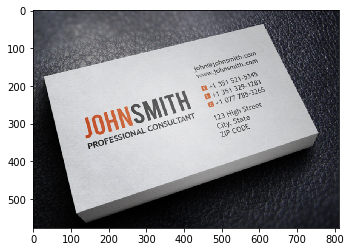

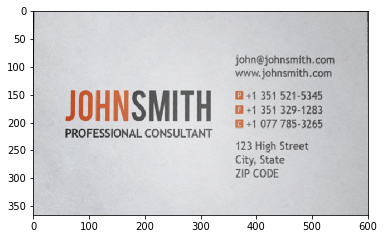

In [3]:
#만약에 실제 크기만큼 출력하고 싶으면

img = cv2.imread("namecard.png")

height, width = img.shape[: 2]

#좌표 순서 - 상단왼쪽 끝, 상단 오른쪽 끝, 하단왼쪽 끝, 하단 오른쪽 끝
point_list = [[27, 179], [611, 36], [118, 534], [754, 325]]

pts1 = np.float32([list(point_list[0]),
                  list(point_list[1]),
                  list(point_list[2]),
                  list(point_list[3])])

pts1 = np.array([[27, 179], [611, 36], [118, 534], [754, 325]], dtype = "float32")

print(pts1)

#두 점 사이의 직선거리 구하기를 이용하면, 실제 크기를 구할 수 있다.

width = int(((27-611)**2 + (179-36)**2)**0.5) #상단 왼쪽 끝의 좌표 - 상단 오른쪽 끝의 좌표
height = int(((27-118)**2 + (179-534)**2)**0.5) #상단 왼쪽 끝의 좌표 - 하단 왼쪽 끝의 좌표

#위에 있는 관계를 아래와 같이 바꾼다.
pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
print(pts2)
#pts2 = np.float32([[0, 0], [width/2.0], [0, height/2.0], [width, height]])

M = cv2.getPerspectiveTransform(pts1, pts2)
print(M)

img_result = cv2.warpPerspective(img, M, (width, height))

#img_result = cv2.warpPerspective(img, M, (int(width/2), int(height/2)))
imshow("", img)
imshow("", img_result)

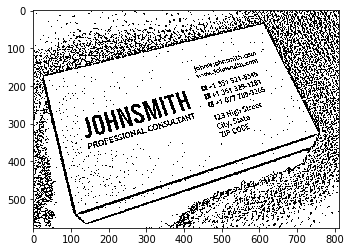

[[ 27. 179.]
 [611.  36.]
 [118. 534.]
 [754. 325.]]
[[  0.   0.]
 [601.   0.]
 [  0. 366.]
 [601. 366.]]
[[ 9.06441665e-01 -2.32355469e-01  1.71177040e+01]
 [ 2.87663846e-01  1.17479501e+00 -2.18055230e+02]
 [-1.29571760e-04  4.23781663e-04  1.00000000e+00]]


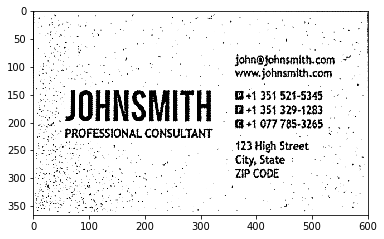

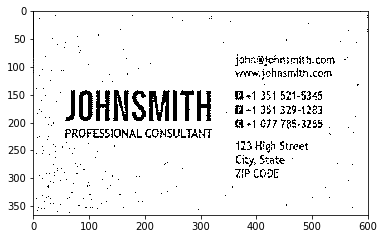

True

In [4]:
#배경이 가죽이라, ADAPTIVE THRESHOLD보다는 일반적인 THRESHOLD가 더 좋다.

img = cv2.imread("namecard.png", 0)

binary = cv2.adaptiveThreshold(img, 255,
          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
          cv2.THRESH_BINARY, 21, 5)

imshow("", binary)

#좌표 순서 - 상단왼쪽 끝, 상단 오른쪽 끝, 하단왼쪽 끝, 하단 오른쪽 끝
point_list = [[27, 179], [611, 36], [118, 534], [754, 325]]

pts1 = np.float32([list(point_list[0]),
                  list(point_list[1]),
                  list(point_list[2]),
                  list(point_list[3])])

pts1 = np.array([[27, 179], [611, 36], [118, 534], [754, 325]], dtype = "float32")

print(pts1)

#두 점 사이의 직선거리 구하기를 이용하면, 실제 크기를 구할 수 있다.

width = int(((27-611)**2 + (179-36)**2)**0.5) #상단 왼쪽 끝의 좌표 - 상단 오른쪽 끝의 좌표
height = int(((27-118)**2 + (179-534)**2)**0.5) #상단 왼쪽 끝의 좌표 - 하단 왼쪽 끝의 좌표

#위에 있는 관계를 아래와 같이 바꾼다.
pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
print(pts2)
#pts2 = np.float32([[0, 0], [width/2.0], [0, height/2.0], [width, height]])

M = cv2.getPerspectiveTransform(pts1, pts2)
print(M)

img_result = cv2.warpPerspective(binary, M, (width, height))

#img_result = cv2.warpPerspective(img, M, (int(width/2), int(height/2)))

imshow("", img_result)

_, binary = cv2.threshold(img_result, 50, 200, cv2.THRESH_BINARY)

imshow("", binary)

cv2.imwrite("binal.png", binary)

~ JOHNSMITH

PROFESSIONAL CONSULTANT

john@johnsmith.com -”

www. johnsmith.com

(+4 354 521-5345
1 +4 354 329-1283
9 +4 077 785-3265 .

123 High Street
City, State

ZIP CODE


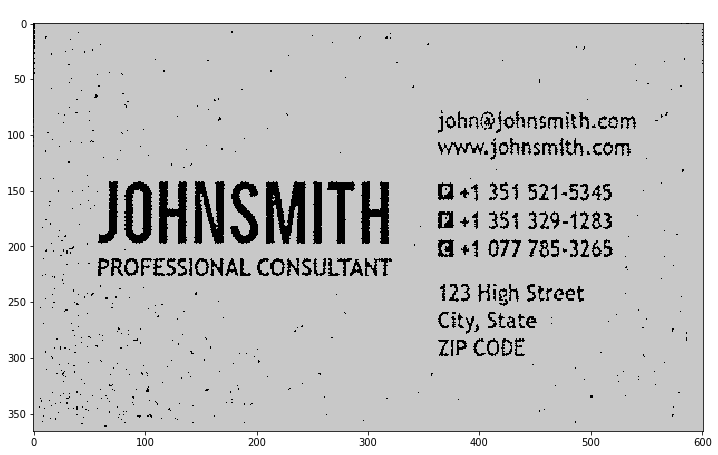

In [5]:
#Threshold로 했을때, #형체만 뚜렷하면, 글씨 색깔은 크게 상관 없다.
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

image = cv2.imread('binal.png')

str = print(pytesseract.image_to_string('binal.png')) #첫번째 파라미터에는 이미지명을 넣어준다.

plt.figure(figsize = (12, 12))
imshow(" ", image)

In [6]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract'
str = pytesseract.image_to_string(img_result)
print(str)



john@{ohnsmith.com “
www.johnsmith.com

Bi 1241 351 521-5345
+4 351 329-1283
4 4 077 785-3265 |.
PROFESSIONAL CONSULTANT :
wink - .123 High Street

City, State
ZIP CODE


In [ ]:
img = cv2.imread("box.jpg")

height, width = img.shape[: 2]

#좌표 순서 - 상단왼쪽 끝, 상단 오른쪽 끝, 하단왼쪽 끝, 하단 오른쪽 끝
point_list = [[61, 161], [231, 64], [220, 251], [386, 154]]

pts1 = np.float32([list(point_list[0]),
                  list(point_list[1]),
                  list(point_list[2]),
                  list(point_list[3])])

pts1 = np.array([[61, 161], [231, 64], [220, 251], [386, 154]], dtype = "float32")

print(pts1)

#위에 있는 관계를 아래와 같이 바꾼다.
pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
print(pts2)
#pts2 = np.float32([[0, 0], [width/2.0], [0, height/2.0], [width, height]])

M = cv2.getPerspectiveTransform(pts1, pts2)
print(M)

img_result = cv2.warpPerspective(img, M, (width, height))
#img_result = cv2.warpPerspective(img, M, (int(width/2), int(height/2)))
imshow("", img)
imshow("", img_result)